INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.27s). [brian2.stateupdaters.base.method_choice]


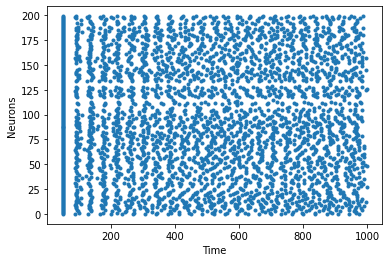

In [1]:
from brian2 import *
import matplotlib.pyplot as plt

eqs = """
dv/dt  = (ge+gi-(v+49*mV))/(20*ms) : volt
dge/dt = -ge/(5*ms)                : volt
dgi/dt = -gi/(10*ms)               : volt
"""
exc_neurons = 160
P = NeuronGroup(200, eqs, threshold="v>-50*mV", reset="v=-60*mV")
P.v = -60 * mV

Pe = P[:exc_neurons]
Ce = Synapses(Pe, P, on_pre="ge+=1.62*mV")
Ce.connect(p=0.02)

Pi = P[exc_neurons:]
Ci = Synapses(Pi, P, on_pre="gi-=9*mV")
Ci.connect(p=0.02)

M = SpikeMonitor(P)
run(1 * second)
plot(M.t / ms, M.i, ".")
plt.ylabel('Neurons')
plt.xlabel('Time')
show()


Above is based on discrete spike events, as opposed to something that's of shape neurons x time. We'll take a histogram of those events.

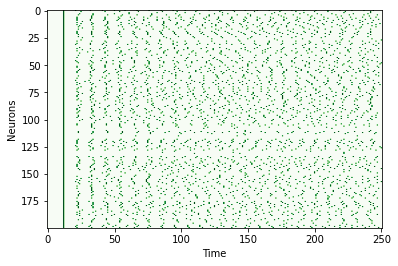

In [30]:
neuron_spike_hist = np.array([
    np.histogram(
        v,
        bins=1000//4+1,
        range=(0, 1),
    )[0]
    for k, v in M.spike_trains().items()
])
# save data to disk for analysis in other file
np.save('neuron_spike_hist', neuron_spike_hist)

plt.imshow(neuron_spike_hist, cmap='Greens', aspect='auto')
plt.ylabel('Neurons')
plt.xlabel('Time')
plt.savefig('images/neuron_spike_hist.png', bbox_inches='tight')

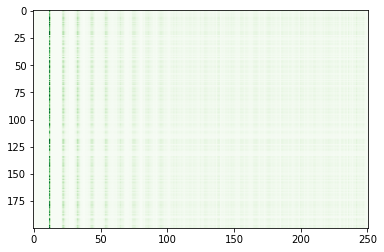

In [31]:
# here's reconstruction with first PC
evals, evecs = np.linalg.eig(neuron_spike_hist.T@neuron_spike_hist)
plt.imshow(np.abs((neuron_spike_hist@evecs[:, 0])[:, None]*evecs[:, 0][None, :]), cmap='Greens', aspect='auto')

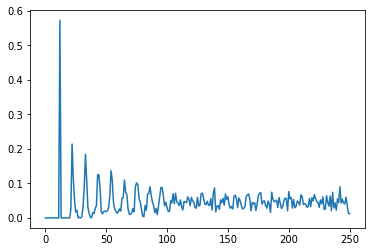

In [32]:
plt.plot(np.abs(evecs[:, 0]))